In [82]:
#Importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#read the file
insurance_df=pd.read_csv('insurance.csv')

In [83]:
insurance_df.head() ##ensuring data load is success 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
insurance_df.info()    ### a,b. taking a look at data set for its shape(u.e. 1338, 7) and data type of column
#insurance_df.shape

###Note : age,bmi,children,charges are numerical clumns here 
###     whereas others are categorical columns, sex (Male/Female) , smoker(no/yes) , 
###  region('southwest', 'southeast', 'northwest', 'northeast')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [85]:
insurance_df.region.unique()  ### to see unique values possible in region column

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [86]:
insurance_df[insurance_df.isna()].count()   ### c. shows that there are no missing values in the data set

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
insurance_df.describe()   ### d. considerring the 5 point summary of all numerical columns 


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


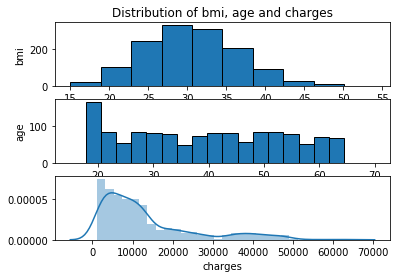

In [88]:
plt.subplot(311)
plt.title('Distribution of bmi, age and charges')
plt.ylabel('bmi')
plt.hist(insurance_df.bmi, 10, range=(15, 54), edgecolor='black')

plt.subplot(312)
plt.hist(insurance_df.age, 20, range=(15, 70), edgecolor='black')
plt.ylabel('age')

plt.subplot(313)
#plt.hist(insurance_df.charges, bins=1000, edgecolor='black',histtype='barstacked')
sns.distplot(insurance_df.charges)
plt.show()

In [89]:
insurance_df.skew(axis = 0, skipna = True) ## skewness of 3 columns(bmi,Age and charges)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

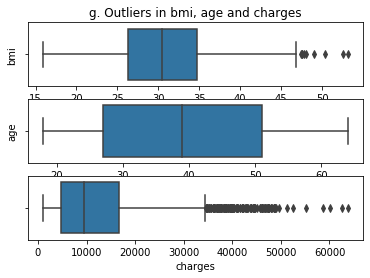

In [90]:
plt.subplot(311)
plt.title('g. Outliers in bmi, age and charges')
plt.ylabel('bmi')
sns.boxplot(insurance_df.bmi)

plt.subplot(312)
sns.boxplot(insurance_df.age)
plt.ylabel('age')

plt.subplot(313)
sns.boxplot(insurance_df.charges)
plt.show()

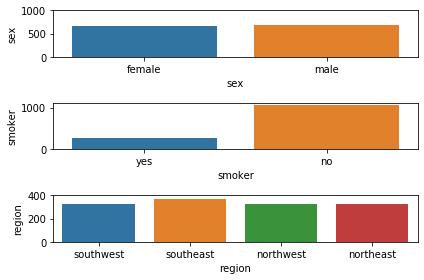

In [91]:
plt.title('Distribution of sex, smoker and region')
#sex (Male/Female) , smoker(no/yes), region('southwest', 'southeast', 'northwest', 'northeast')

ax1 = plt.subplot(311)
ax1.set_xlim([0, 2])
ax1.set_ylim([0, 1000])
sns.countplot(insurance_df.sex)
plt.ylabel('sex')

plt.subplot(312)
sns.countplot(insurance_df.smoker)
plt.ylabel('smoker')

ax3=plt.subplot(313)
sns.countplot(insurance_df.region)
#ax3.set_xlim([0, 4])
ax3.set_ylim([0, 400])
plt.ylabel('region')

plt.tight_layout()
plt.show()

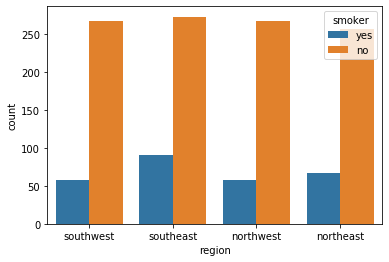

In [92]:
sns.countplot(x="region", hue="smoker", data=insurance_df)  ## shows most of smokers are from southeast region

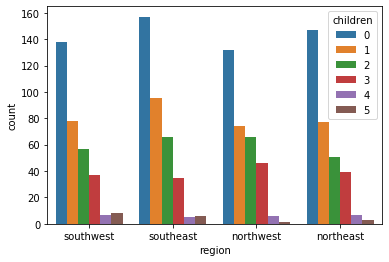

In [93]:
sns.countplot(x="region", hue="children", data=insurance_df)  ## shows ppl with 3 kids are similar in all regions. 

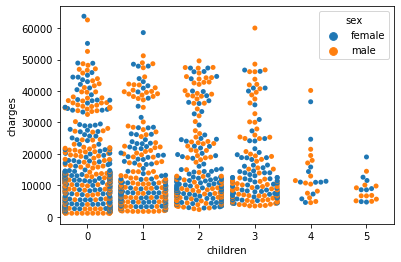

In [94]:
sns.swarmplot(x='children',y='charges',hue='sex',data=insurance_df)
plt.show()

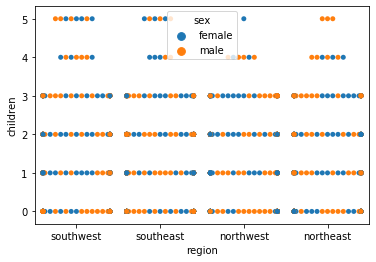

In [95]:
sns.swarmplot(y='children',x='region',hue='sex',data=insurance_df)

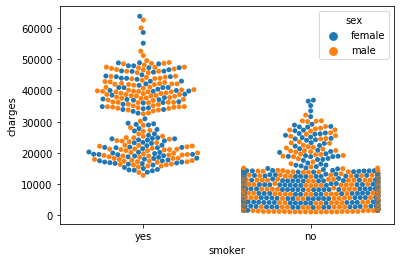

In [96]:
sns.swarmplot(y='charges',x='smoker',hue='sex',data=insurance_df)

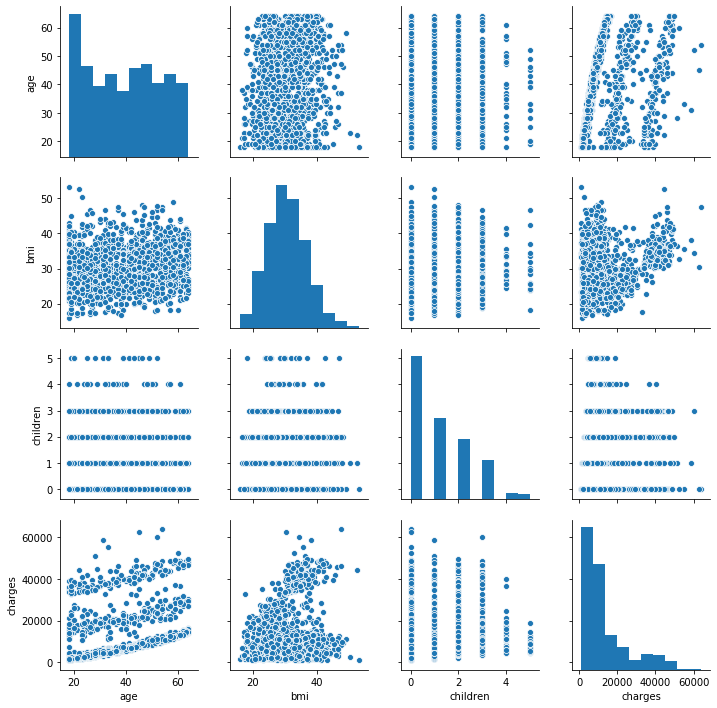

In [97]:
### i. pairplot all varibales including categorical.

## Note : by default pairplot shows only numerical columns
sns.pairplot(insurance_df) 

In [98]:
## convert all categorical columns into numerical , then pairplot

# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in insurance_df.columns: # Loop through all columns in the dataframe
    if insurance_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes # Replace strings with an integer

In [99]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int8
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int8
region      1338 non-null int8
charges     1338 non-null float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.8 KB


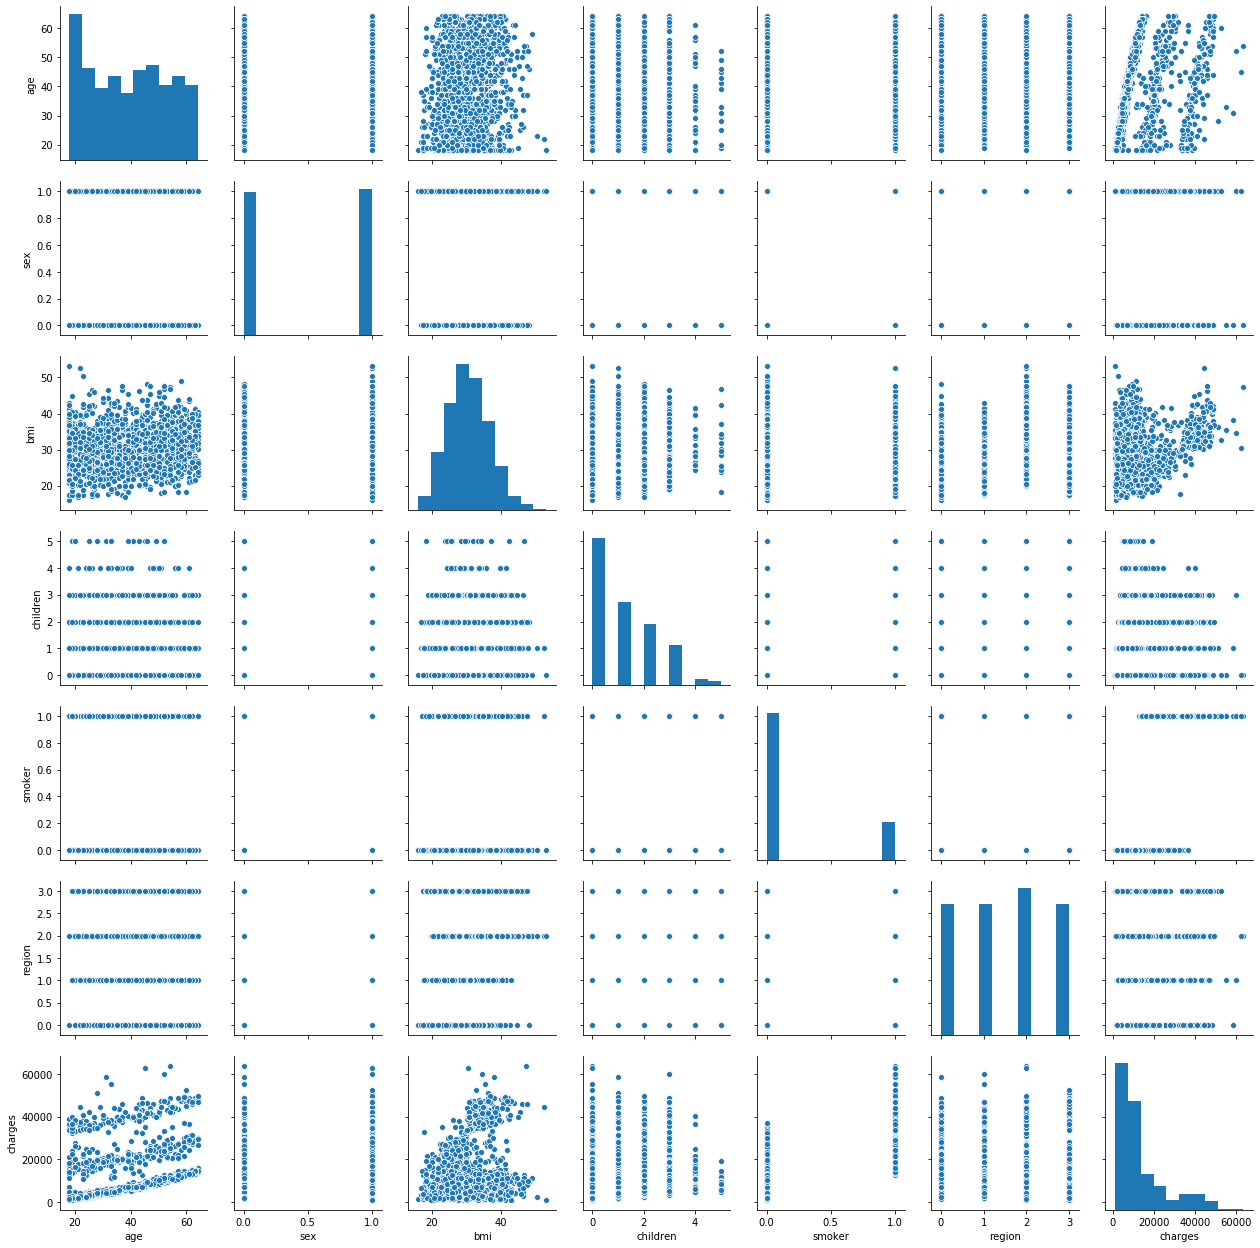

In [100]:
#Now we can pairplot to include all variables
sns.pairplot(insurance_df)

### 4.a. Do charges of people who smoke differ significantly  from the people who don't?  

In [101]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [102]:
from scipy.stats             import ttest_ind
import scipy.stats as stats

smokerCharges = np.array(insurance_df[insurance_df.smoker==1]['charges'])
print(smokerCharges.shape) ##274
#insurance_df.smoker.shape ##1338

nonSmokerCharges = np.array(insurance_df[insurance_df.smoker==0]['charges'])
print(nonSmokerCharges.shape) ##1064

t_statistic, p_value  =  stats.ttest_ind(smokerCharges, nonSmokerCharges)
print('alpha=0.050 and 2 tailed P Value',p_value) 

(274,)
(1064,)
alpha=0.050 and 2 tailed P Value 8.271435842177219e-283


### 4.b. Does bmi of males differ significantly from that of  females?  

In [103]:
#Null Hypothesis : There is no significant difference between data sets i.e. bmi of males vs females. 
#Alternate Hypothesis : There is a significant difference

from scipy.stats             import ttest_ind
import scipy.stats as stats

maleBmi = np.array(insurance_df[insurance_df.sex==1]['bmi'])
print(maleBmi.shape) ##274
#insurance_df.smoker.shape ##1338

femaleBmi = np.array(insurance_df[insurance_df.sex==0]['bmi'])
print(femaleBmi.shape) ##1064

t_statistic, p_value  =  stats.ttest_ind(maleBmi, femaleBmi)
print('alpha=0.050 and 2 tailed P Value',p_value) 

(676,)
(662,)
alpha=0.050 and 2 tailed P Value 0.08997637178984932


### 4.c. Is the proportion of smokers significantly different  in different genders?

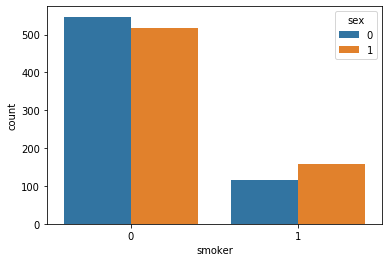

In [104]:
#Null Hypothesis : There is no significant difference between data sets i.e. bmi of males vs females. 
#Alternate Hypothesis : There is a significant difference

from scipy.stats             import ttest_ind
import scipy.stats as stats

##Exploring data for distribution at glance
#Note: 0=female ; 1= male ....smoker = 1 =>yes ; 0=>No

sns.countplot(x='smoker',data=insurance_df,hue='sex')

In [105]:
##Using Chi square test for analysing distribution of smokers across genders.

smokers_df = insurance_df[insurance_df.smoker==1]
smokers_df_arr = np.array(smokers_df)
chi2, p, dof, ex = stats.chi2_contingency(smokers_df_arr)

print("chi2 stat =",chi2)
print("p-value=",p)
print("degree of freedom=",dof)
print("contingency=",ex)

chi2 stat = 3254.2372516696983
p-value= 2.2925502659788545e-109
degree of freedom= 1638
contingency= [[2.03051731e+01 3.05934097e-01 1.61897149e+01 ... 5.27207186e-01
  7.96583120e-01 1.68971125e+04]
 [3.34506686e+01 5.03994723e-01 2.66708777e+01 ... 8.68519208e-01
  1.31228815e+00 2.78362420e+04]
 [4.75801186e+01 7.16880400e-01 3.79365668e+01 ... 1.23537880e+00
  1.86659425e+00 3.95941770e+04]
 ...
 [3.38007770e+01 5.09269737e-01 2.69500260e+01 ... 8.77609485e-01
  1.32602309e+00 2.81275874e+04]
 [5.27342267e+01 7.94536345e-01 4.20460389e+01 ... 1.36920100e+00
  2.06879275e+00 4.38832094e+04]
 [3.50493642e+01 5.28081958e-01 2.79455492e+01 ... 9.10028028e-01
  1.37500585e+00 2.91666093e+04]]


### 4.d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 


In [106]:
#Null Hypothesis : There is no significant difference between data sets i.e. bmi of females with children count 0, 1 and 2. 
#Alternate Hypothesis : There is a significant difference

#from data set we came to know the mapping taken is sex : 0=female; 1=male

from scipy.stats             import ttest_ind
import scipy.stats as stats
from scipy.stats import levene

bmiChild0 = np.array(insurance_df[(insurance_df.sex==0) & (insurance_df.children==0)]['bmi'])
bmiChild1 = np.array(insurance_df[(insurance_df.sex==0) & (insurance_df.children==1)]['bmi'])
bmiChild2 = np.array(insurance_df[(insurance_df.sex==0) & (insurance_df.children==2)]['bmi'])

print(bmiChild0.shape)
print(bmiChild1.shape)
print(bmiChild2.shape)

print("Lets check first Levene Test's : H0 :var of 3 datasets are same ; Ha: var of 3 datasets are not same. ")
statistic,pvalue=levene(bmiChild0,bmiChild1,bmiChild2)
print("statistic" , statistic ,"pvalue:",pvalue) 

(289,)
(158,)
(119,)
Lets check first Levene Test's : H0 :var of 3 datasets are same ; Ha: var of 3 datasets are not same. 
statistic 0.9433311607108589 pvalue: 0.3899432394522804


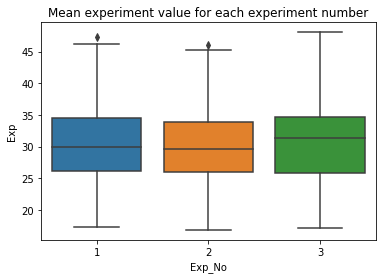

In [107]:
experiment_df = pd.DataFrame()

df1            = pd.DataFrame({'Exp_No': '1', 'Exp':bmiChild0})
df2            = pd.DataFrame({'Exp_No': '2', 'Exp':bmiChild1})
df3            = pd.DataFrame({'Exp_No': '3', 'Exp':bmiChild2})

experiment_df = experiment_df.append(df1) 
experiment_df = experiment_df.append(df2) 
experiment_df = experiment_df.append(df3) 

sns.boxplot(x = "Exp_No", y = "Exp", data = experiment_df)
plt.title('Mean experiment value for each experiment number')
plt.show()

In [108]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Exp ~ Exp_No', data = experiment_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Exp_No       24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN
